In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [73]:
df=pd.read_csv("weight_height_dataset.csv")

In [74]:
df

,Weight,Height.
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


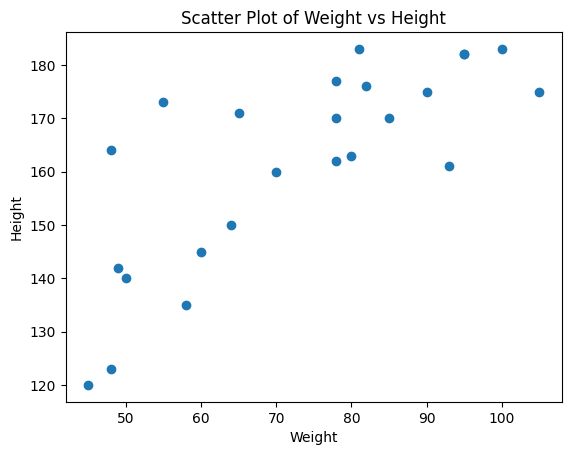

In [75]:
plt.scatter(df['Weight'], df['Height. '])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Scatter Plot of Weight vs Height")
plt.show()


## Step-2 : dividing data set to independent and dependent features

In [76]:
# diviing data set to independent and dependent data set
X=df[['Weight']] # independent feature
y=df['Height. ']
X
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    183
18    173
19    161
20    171
21    164
22    150
23    142
Name: Height. , dtype: int64

## Step-3: train test split

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
print(X_train.shape, X_test.shape, X.shape)

(19, 1) (5, 1) (24, 1)


## step-4: Satandarazation: because to  reducde the scattering i,e 40 to 120  to get opimized best fit line and redcude gradient decent

In [80]:
X_train

,Weight
9,78
13,100
1,58
21,48
5,78
2,48
12,105
15,78
3,60
4,70


In [81]:
scaler = StandardScaler()

# Fit the scaler on X_train and transform it
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
X_train

array([[ 0.22278311],
       [ 1.55311656],
       [-0.98661093],
       [-1.59130795],
       [ 0.22278311],
       [-1.59130795],
       [ 1.85546507],
       [ 0.22278311],
       [-0.86567153],
       [-0.2609745 ],
       [-0.62379272],
       [ 0.40419222],
       [-0.56332302],
       [-1.53083825],
       [ 0.94841954],
       [ 0.46466192],
       [ 0.64607103],
       [ 1.12982865],
       [ 0.34372252]])

Text(0, 0.5, 'y_train')

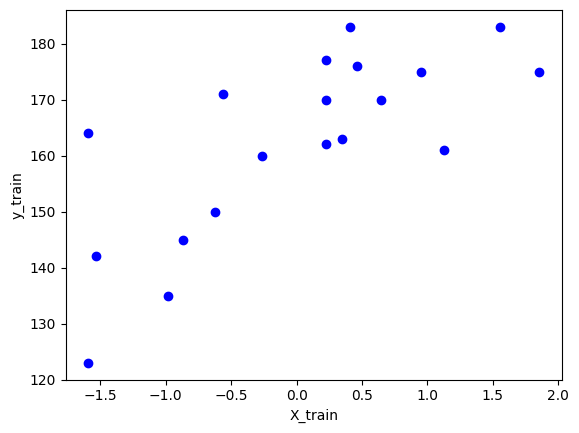

In [83]:
plt.scatter(X_train, y_train, color='blue', label='Data Points')

# Adding labels and title
plt.xlabel('X_train')
plt.ylabel('y_train')


## trainnf model 

In [84]:
from sklearn.linear_model import LinearRegression


In [85]:
regressor=LinearRegression()

In [86]:
regressor.fit(X_train,y_train)

LinearRegression()

In [87]:
print("slope of coeeficent of weight is",regressor.coef_)
print("intercept",regressor.intercept_)

slope of coeeficent of weight is [11.96596579]
intercept 162.3684210526316


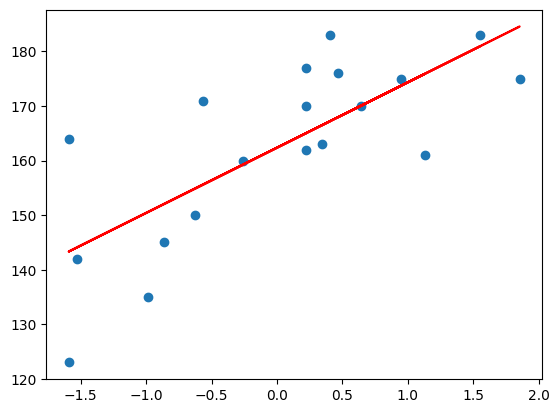

In [88]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [89]:
y_pred_test=regressor.predict(X_test)

In [90]:
y_test,y_pred_test

(8     182
 16    140
 0     120
 18    173
 11    182
 Name: Height. , dtype: int64,
 array([177.33506878, 144.77404129, 141.15614934, 148.39193323,
        177.33506878]))

In [68]:
# computing r2 and adjusted r2

## performance metrics
### MSE, MAE,RMSE
### R SQUARE , ADJUSTED RSQUARE

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [92]:
mse=mean_squared_error(y_test,y_pred_test)
mse

223.89084840846036

In [93]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.6429400861054154

In [94]:
regressor


LinearRegression()

In [96]:
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\users\sri vardhan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.34372252]])

In [98]:
regressor.predict([scaled_weight[0]])

array([166.48139295])